In [87]:
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense,BatchNormalization
from keras.utils import to_categorical
import sklearn
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import pandas as pd


## Data Preparation

In [88]:
df = pd.read_csv('C:/Users/Emirhan/Desktop/emotions/icml_face_data.csv')

In [89]:
df.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


##### 0: Angry
##### 1: Disgust
##### 2: Fear
##### 3: Happy
##### 4: Sad
##### 5: Suprise
##### 6: Neutral

In [90]:
len(df)

35887

In [91]:
df[' Usage']

0           Training
1           Training
2           Training
3           Training
4           Training
            ...     
35882    PrivateTest
35883    PrivateTest
35884    PrivateTest
35885    PrivateTest
35886    PrivateTest
Name:  Usage, Length: 35887, dtype: object

In [92]:
df['emotion'].value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

In [93]:
training = df[(df[' Usage']=='Training')]
validation = df[(df[' Usage']=='PrivateTest')]
test = df[(df[' Usage']== 'PublicTest')]


In [94]:
test

,emotion,Usage,pixels
28709,0,PublicTest,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
28710,1,PublicTest,156 184 198 202 204 207 210 212 213 214 215 21...
28711,4,PublicTest,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
28712,6,PublicTest,205 203 236 157 83 158 120 116 94 86 155 180 2...
28713,3,PublicTest,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...
...,...,...,...
32293,4,PublicTest,178 176 172 173 173 174 176 173 166 166 206 22...
32294,3,PublicTest,25 34 42 44 42 47 57 59 59 58 54 51 50 56 63 6...
32295,4,PublicTest,255 255 255 255 255 255 255 255 255 255 255 25...
32296,4,PublicTest,33 25 31 36 36 42 69 103 132 163 175 183 187 1...


In [95]:
training

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
28704,2,Training,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,Training,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,Training,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,Training,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


In [96]:
train_pixels = list(training[' pixels'].str.split(' '))
train_images = np.array(train_pixels, dtype=np.float)

val_pixels = list(validation[' pixels'].str.split(' '))
val_images = np.array(val_pixels, dtype=np.float)

test_pixels = list(test[' pixels'].str.split(' '))
test_images = np.array(test_pixels, dtype=np.float)


C:\Users\Emirhan\AppData\Local\Temp\ipykernel_1448\89056989.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_images = np.array(train_pixels, dtype=np.float)
C:\Users\Emirhan\AppData\Local\Temp\ipykernel_1448\89056989.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  val_images = np.array(val_pixels, dtype=np.float)
C:\Users\Emi

In [97]:
print(train_images.shape)
print(val_images.shape)
print(test_images.shape)

(28709, 2304)
(3589, 2304)
(3589, 2304)


In [98]:
y_train = training['emotion']
y_val = validation['emotion']
y_test = test['emotion']

In [99]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(28709,)
(3589,)
(3589,)


In [100]:
def show(index):
    show_image = train_images[index].reshape(48,48)
    plt.imshow(show_image,cmap='gray')
    print('Emotion:',y_train[index])

Emotion: 4


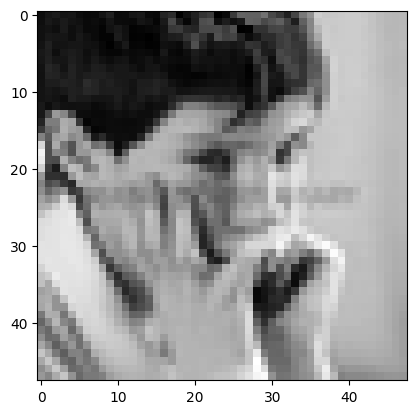

In [101]:
show(3)

Emotion: 2


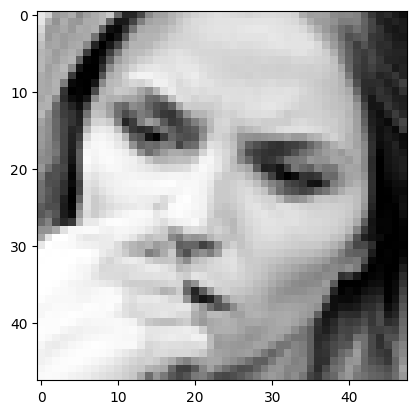

In [102]:
show(2)

## Preprocessing

In [103]:
images_train = []
for train_image in train_images:
    image_dim = train_image.reshape(48,48)
    image_dim = list(image_dim)
    images_train.append(image_dim)


In [104]:
images_val = []
for val_image in val_images:
    image_dim = val_image.reshape(48,48)
    image_dim = list(image_dim)
    images_val.append(image_dim)

In [105]:
images_test = []
for test_image in test_images:
    image_dim = test_image.reshape(48,48)
    image_dim = list(image_dim)
    images_test.append(image_dim)

In [106]:
images_train = np.array(images_train)
images_val = np.array(images_val)
images_test = np.array(images_test)


In [107]:
print(images_train.shape)
print(images_val.shape)
print(images_test.shape)

(28709, 48, 48)
(3589, 48, 48)
(3589, 48, 48)


In [108]:
X_train = np.expand_dims(images_train,3)
X_val = np.expand_dims(images_val,3)
X_test = np.expand_dims(images_test,3)

In [109]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(28709, 48, 48, 1)
(3589, 48, 48, 1)
(3589, 48, 48, 1)


In [110]:
y_train_cat= to_categorical(y_train,num_classes=7)
y_val_cat = to_categorical(y_val,num_classes=7)
y_test_cat = to_categorical(y_test,num_classes=7)

In [111]:
print(y_train_cat.shape)
print(y_val_cat.shape)
print(y_test_cat.shape)

(28709, 7)
(3589, 7)
(3589, 7)


### Creating Model

In [112]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape = (48,48,1)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides =2))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.6))


model.add(Dense(7))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 batch_normalization_6 (Batc  (None, 20, 20, 64)      

In [113]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [114]:
epochs = 10
batch_size = 128

result = model.fit(X_train, y_train_cat, batch_size=batch_size, epochs=epochs, verbose =1,
                   validation_data=(X_val,y_val_cat),shuffle=True) 

Epoch 1/10
225/225 [==============================] - 10s 39ms/step - loss: 2.0248 - accuracy: 0.2483 - val_loss: 1.6824 - val_accuracy: 0.3252
Epoch 2/10
225/225 [==============================] - 9s 38ms/step - loss: 1.6246 - accuracy: 0.3753 - val_loss: 1.5545 - val_accuracy: 0.3876
Epoch 3/10
225/225 [==============================] - 9s 38ms/step - loss: 1.4097 - accuracy: 0.4585 - val_loss: 1.4005 - val_accuracy: 0.4558
Epoch 4/10
225/225 [==============================] - 9s 38ms/step - loss: 1.2928 - accuracy: 0.5109 - val_loss: 1.2326 - val_accuracy: 0.5255
Epoch 5/10
225/225 [==============================] - 9s 39ms/step - loss: 1.2171 - accuracy: 0.5389 - val_loss: 1.2257 - val_accuracy: 0.5286
Epoch 6/10
225/225 [==============================] - 9s 39ms/step - loss: 1.1586 - accuracy: 0.5636 - val_loss: 1.1815 - val_accuracy: 0.5442
Epoch 7/10
225/225 [==============================] - 9s 39ms/step - loss: 1.0987 - accuracy: 0.5863 - val_loss: 1.1511 - val_accuracy: 0.554

### Model Evaluate

In [115]:
model.evaluate(X_test,y_test_cat)

113/113 [==============================] - 1s 7ms/step - loss: 1.2640 - accuracy: 0.5481


[1.2640166282653809, 0.5480635166168213]

In [116]:
from sklearn.metrics import classification_report

In [117]:
preds_prob=model.predict(X_test)
predictions = np.argmax(preds_prob,axis=1)


113/113 [==============================] - 1s 4ms/step


In [118]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.39      0.45       467
           1       0.53      0.18      0.27        56
           2       0.41      0.25      0.31       496
           3       0.60      0.89      0.72       895
           4       0.44      0.43      0.44       653
           5       0.81      0.63      0.71       415
           6       0.48      0.53      0.50       607

    accuracy                           0.55      3589
   macro avg       0.55      0.47      0.48      3589
weighted avg       0.54      0.55      0.53      3589



### Predictions

In [119]:
def single_predict(img):

    emotions = ['Angry', 'Disgust','Fear','Happy','Sad','Suprise','Neutral']

    single_image =np.reshape(img,(1,48,48,1))
    pred = model.predict(single_image)
    prediction = np.argmax(pred,axis=1)
    print('Emotion:',emotions[prediction[0]])
    plt.imshow(img)

1/1 [==============================] - 0s 30ms/step
Emotion: Suprise


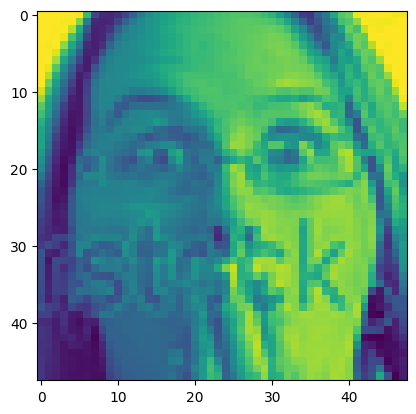

In [120]:
single_predict(X_test[16])

1/1 [==============================] - 0s 35ms/step
Emotion: Angry


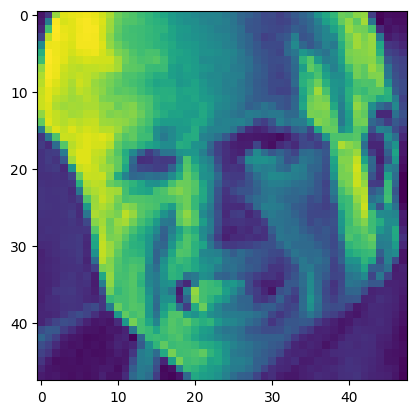

In [121]:
single_predict(X_test[99])

#### Prediction from external image

1/1 [==============================] - 0s 168ms/step
Emotion: Happy


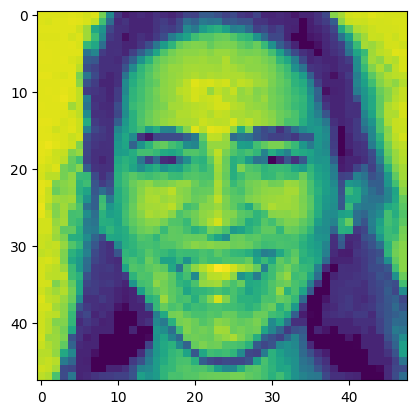

In [122]:
test_pad = 'test_image/test.png'
test_img = cv2.imread(test_pad,0)
test_img = cv2.resize(test_img,(48,48))
single_predict(test_img)
